In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import calendar


In [2]:
df = pd.read_csv(r"C:\Users\user\Downloads\Online Retail Data Set.csv",encoding = "unicode_escape")
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01-12-2010 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01-12-2010 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01-12-2010 08:34,1.69,13047.0,United Kingdom


In [3]:
pd.options.mode.chained_assignment = None 

In [4]:
 df.info() #ตรวจสอบdatatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']) #เปลี่ยนประเภทข้อมูลให้เหมาะสม

In [6]:
df.duplicated().sum() #จำนวนแถวที่มีข้อมูลซ้ำกัน
df = df.drop_duplicates() 
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France


In [7]:
df.duplicated().sum() 

0

In [8]:
df.isna().sum() #จำนวนแถวที่ข้อมูลขาดหายไปในแต่ละคอลัมน์ 

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [9]:
df['Description'] = df['Description'].fillna("Unknown")
df['CustomerID'] = df['CustomerID'].fillna(0)

In [10]:
df['Date'] = df['InvoiceDate'].dt.date
df['Time'] = df['InvoiceDate'].dt.time
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,2010-01-12,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,2010-01-12,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12,08:26:00
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France,2011-09-12,12:50:00
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France,2011-09-12,12:50:00
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France,2011-09-12,12:50:00
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France,2011-09-12,12:50:00


In [11]:
df['Total'] = df['Quantity']*df['UnitPrice']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,2010-01-12,08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12,08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,2010-01-12,08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12,08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12,08:26:00,20.34
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France,2011-09-12,12:50:00,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France,2011-09-12,12:50:00,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France,2011-09-12,12:50:00,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France,2011-09-12,12:50:00,16.60


<Axes: ylabel='UnitPrice'>

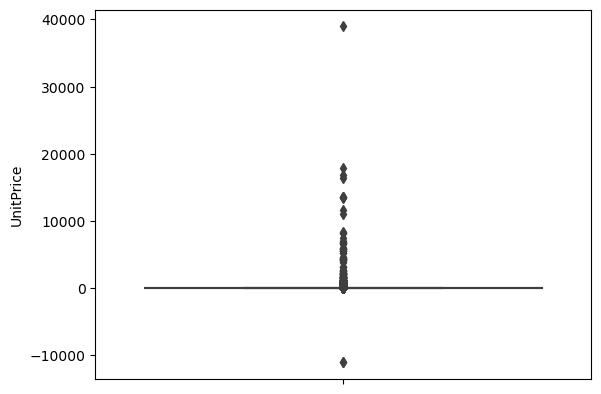

In [12]:
sns.boxplot(y = 'UnitPrice', data = df) #จะเห็นว่ามีราคาต่อหน่วยที่อยู่ในค่าติดลบ

In [13]:
df[df['UnitPrice'] < 0] #แสดงแถวที่มีราคาต่อหน่วยติดลบ จะเห็นว่ามีคำอธิบายว่าเป็นหนี้ ซึ่งเราไม่ต้องการนำมาวิเคราะห์

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time,Total
299983,A563186,B,Adjust bad debt,1,2011-12-08 14:51:00,-11062.06,0.0,United Kingdom,2011-12-08,14:51:00,-11062.06
299984,A563187,B,Adjust bad debt,1,2011-12-08 14:52:00,-11062.06,0.0,United Kingdom,2011-12-08,14:52:00,-11062.06


In [14]:
debt =df['Description'].str.contains('debt', case=False) #case=False ไม่คำนึงถึงตัวพิมเล็ก-ใหญ่
df = df[~debt] #เอาเฉพาะที่ไม่มีคำว่าdebt (ไม่ตรงตามเงื่อนไขของตัวแปร debt)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,2010-01-12,08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12,08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,2010-01-12,08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12,08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12,08:26:00,20.34
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France,2011-09-12,12:50:00,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France,2011-09-12,12:50:00,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France,2011-09-12,12:50:00,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France,2011-09-12,12:50:00,16.60


In [15]:
df = df[df['UnitPrice']>0] #เลือกเฉพาะราคาต่อหน่วยมากกว่า 0
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,2010-01-12,08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12,08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,2010-01-12,08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12,08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12,08:26:00,20.34
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France,2011-09-12,12:50:00,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France,2011-09-12,12:50:00,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France,2011-09-12,12:50:00,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France,2011-09-12,12:50:00,16.60


In [16]:
df['UnitPrice'].min() #ตรวจสอบค่าน้อยสุด

0.001

<Axes: ylabel='Quantity'>

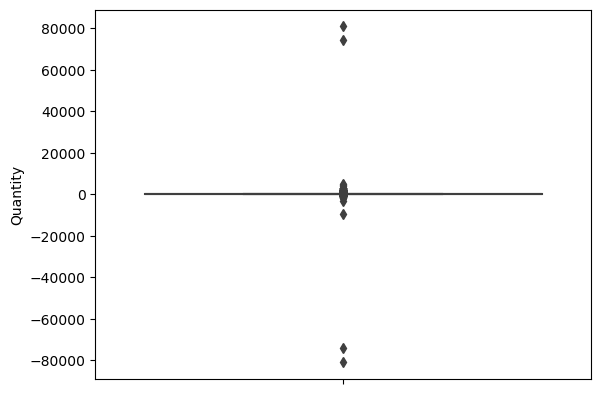

In [17]:
sns.boxplot(y = 'Quantity', data=df) #การมีปริมาณสินค้าติดลบ ซึ่งเกิดจากการยกเลิกคำสั่งซื้อ

In [18]:
df =  df[df['Quantity'] > 0] #กำหนดให้dfปัจจุบันมีแค่คำสั่งซื้อที่ไม่ถูกยกเลิก

In [19]:
df['Quantity'].min() #ตรวจสอบได้ว่าไม่มีคำสั่งซื้อที่เป็นเลขติดลบเหลืออยู่

1

In [20]:
#1). which product are driving the most revenue

grouped = df.groupby('Description')['Total'].sum().reset_index()
print(grouped)

                           Description    Total
0        4 PURPLE FLOCK DINNER CANDLES   285.70
1        50'S CHRISTMAS GIFT BAG LARGE  2343.63
2                    DOLLY GIRL BEAKER  2886.25
3          I LOVE LONDON MINI BACKPACK  1624.02
4          I LOVE LONDON MINI RUCKSACK     4.15
...                                ...      ...
4020   ZINC T-LIGHT HOLDER STARS SMALL  4197.83
4021    ZINC TOP  2 DOOR WOODEN SHELF    270.08
4022  ZINC WILLIE WINKIE  CANDLE STICK  2712.70
4023       ZINC WIRE KITCHEN ORGANISER   239.97
4024  ZINC WIRE SWEETHEART LETTER TRAY   275.62

[4025 rows x 2 columns]


In [21]:
sorted_df = grouped.sort_values('Total',ascending=False).head(5) #แสดง top5 ผลิตภัณฑ์ที่สร้างรายได้ให้มากที่สุด
print(sorted_df)

                             Description      Total
1066                      DOTCOM POSTAGE  206248.77
2852            REGENCY CAKESTAND 3 TIER  174156.54
2386         PAPER CRAFT , LITTLE BIRDIE  168469.60
3843  WHITE HANGING HEART T-LIGHT HOLDER  106236.72
2412                       PARTY BUNTING   99445.23


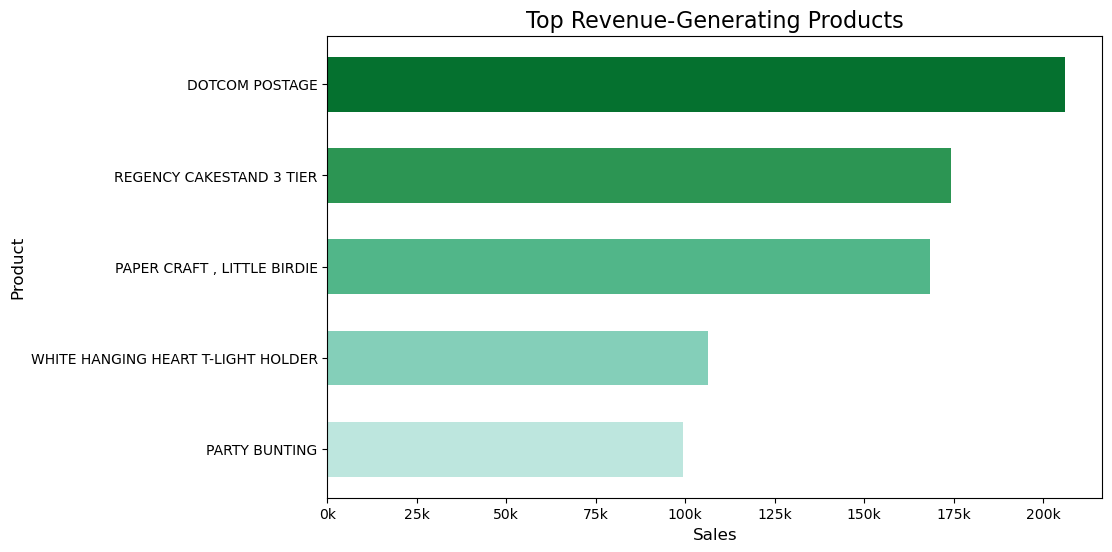

In [50]:
from matplotlib.ticker import StrMethodFormatter

plt.figure(figsize=(10, 6))
#กำหนดสีและสลับสีให้เรียงจากเข้มไปอ่อน
color_palette = sns.color_palette('BuGn_r')
#กำหนดให้เป็นกราฟแท่งแนวนอน
plt.barh(sorted_df['Description'], sorted_df['Total'] / 1000, height=0.6, color=color_palette)
plt.title('Top Revenue-Generating Products',fontsize=16)
plt.xlabel('Sales',fontsize=12)
plt.ylabel('Product',fontsize=12)
#กำหนดให้ตัว k  แสดงแทนค่าหลักพัน
formatter = StrMethodFormatter('{x:.0f}k')
plt.gca().xaxis.set_major_formatter(formatter)
plt.yticks(size=10)
#กลับด้านกราฟให้แสดงจากค่ามากไปน้อย
plt.gca().invert_yaxis()


In [24]:
#DOTCOM POSTAGE  สร้างรายได้ให้มากที่สุด

In [25]:
#2) What was the best month for sales ? 
#สร้างคอลัมเดือน เพื่อใช้ในการแบ่งกลุ่ม 
df['Month'] = df['InvoiceDate'].dt.month_name()
#และสร้างคอลัมปี เพื่อใช้แยกปีอีกที
df['Year'] = df['InvoiceDate'].dt.year

df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time,Total,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,2010-01-12,08:26:00,15.30,January,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12,08:26:00,20.34,January,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,2010-01-12,08:26:00,22.00,January,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12,08:26:00,20.34,January,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12,08:26:00,20.34,January,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France,2011-09-12,12:50:00,10.20,September,2011
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France,2011-09-12,12:50:00,12.60,September,2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France,2011-09-12,12:50:00,16.60,September,2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France,2011-09-12,12:50:00,16.60,September,2011


In [26]:
years = df['Year'].unique() #ตรวจสอบว่าข้อมูลมีปีไหนบ้าง
print(years)

[2010 2011]


In [27]:
sales_by_month = df.groupby(['Year', 'Month'])['Total'].sum() #รวมยอดขายทั้งหมดแยกตามเดือนและปี
sales_2010 = sales_by_month.loc[2010]
sales_2011 = sales_by_month.loc[2011]
#กำหนดชื่อเดือนเพื่อใช้ในการเรียงข้อมุลเดือน
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sorted_sales_2010 = sales_2010.reindex(month, level='Month')
sorted_sales_2011 = sales_2011.reindex(month, level='Month')

In [28]:
#เพิ่ม0ให้เดือนที่ขาดหายไปเพื่อใช้ในการซ้อนทับแท่งกราฟระหว่างปี2010และ2011
sorted_sales_2010.loc[('April')] = 0
sorted_sales_2010.loc[('November')] = 0


In [29]:
sorted_sales_2010

Month
January       58776.79
February      47629.42
March         46898.63
April             0.00
May           31364.63
June          54624.15
July          99553.85
August        45235.36
September     53548.19
October       59021.02
November          0.00
December     324800.69
Name: Total, dtype: float64

In [30]:
sorted_sales_2011

Month
January       700510.610
February      575211.670
March         756961.460
April         706669.411
May           824906.880
June          786516.590
July          905018.561
August        753503.840
September    1203625.302
October      1027029.940
November     1336139.480
December      233502.270
Name: Total, dtype: float64

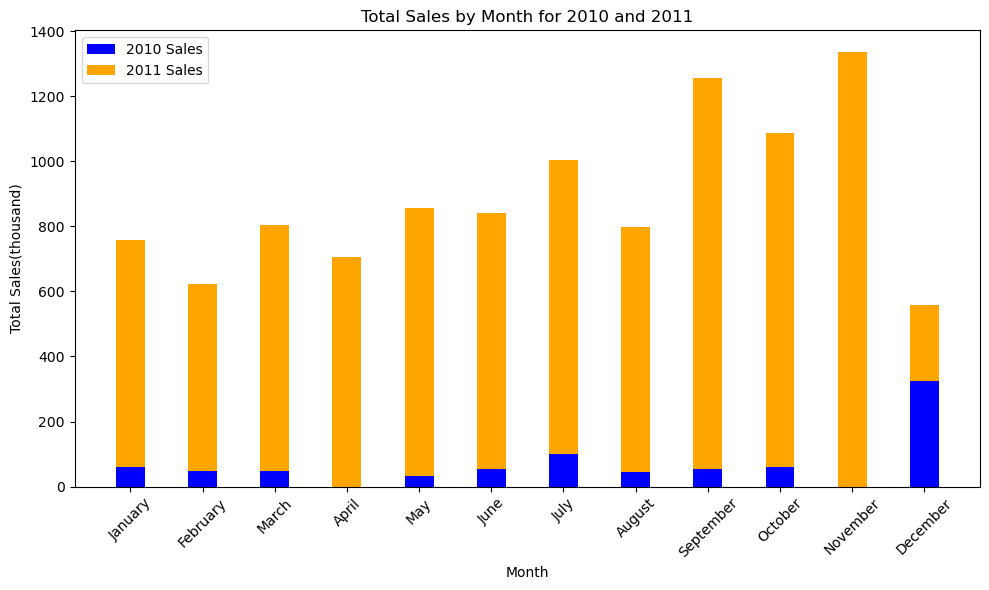

In [31]:
#ข้อมูลยอดขายทั้ง2ปีรวมกันในแต่ละเดือน (2010,2011)
plt.figure(figsize=(10, 6))
bar_width = 0.4
plt.bar(sorted_sales_2010.index, sorted_sales_2010.values/1000,width = bar_width, label='2010 Sales',color='blue')
plt.bar(sorted_sales_2011.index, sorted_sales_2011.values/1000,width = bar_width, bottom=sorted_sales_2010.values/1000, label='2011 Sales',color='orange')
plt.title('Total Sales by Month for 2010 and 2011')
plt.xlabel('Month')
plt.ylabel('Total Sales(thousand)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [32]:

#หากรวมปริมาณยอดขายใน2ปี เดือนพฤศจิกายนปี2011 ขายดีที่สุด


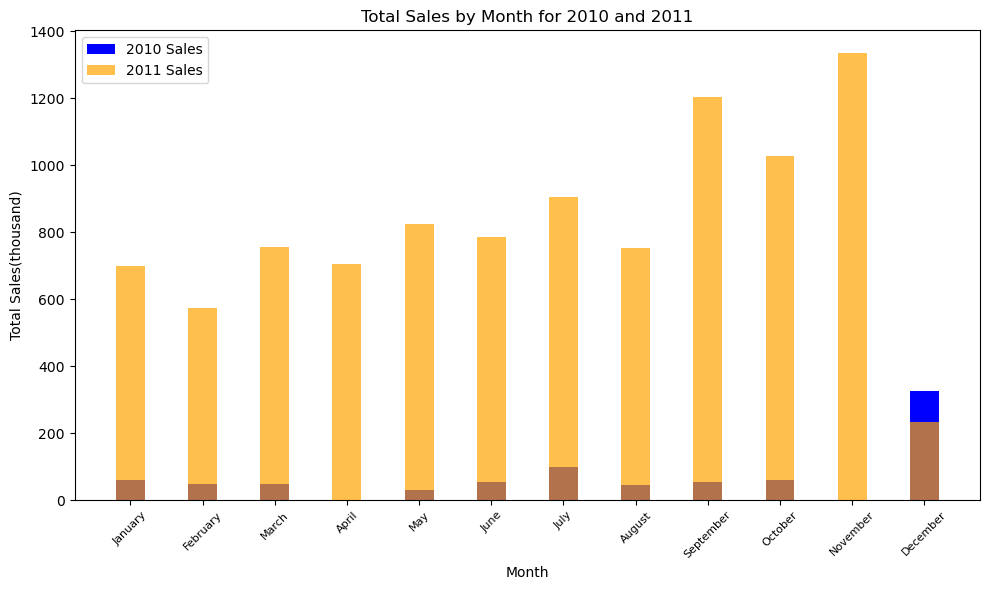

In [33]:
#ข้อมูลยอดขายของปี2010และ2011 ในแต่ละเดือน
plt.figure(figsize=(10, 6))
bar_width = 0.4
plt.bar(sorted_sales_2010.index, sorted_sales_2010.values/1000,width = bar_width, label='2010 Sales',color='blue')
plt.bar(sorted_sales_2011.index, sorted_sales_2011.values/1000,width = bar_width, label='2011 Sales',color='orange',alpha=0.7)
plt.title('Total Sales by Month for 2010 and 2011')
plt.xlabel('Month')
plt.ylabel('Total Sales(thousand)')
plt.xticks(rotation=45,size=8)
plt.legend()
plt.tight_layout()
plt.show()

In [34]:
#หากแบ่งแยกตามปี ปี2010 เดือนธันวาคม และปี 2011 เดือนพฤศจิกายน ขายดีที่สุด
#คาดการณ์ได้ว่าบริษัทมักจะขายดีในช่วงสิ้นปี ซึ่งมีเทศกาลจำนวนมากให้คนออกมาใช้จ่าย

In [35]:
# 2) What time should we display advertisements to maximize likelihood of customer's buying product?
df['Hour']=df['InvoiceDate'].dt.hour #สร้างคอลัมชั่วโมงเพื่อใช้ในการวิเคราะห์
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time,Total,Month,Year,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,2010-01-12,08:26:00,15.30,January,2010,8
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12,08:26:00,20.34,January,2010,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,2010-01-12,08:26:00,22.00,January,2010,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12,08:26:00,20.34,January,2010,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12,08:26:00,20.34,January,2010,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France,2011-09-12,12:50:00,10.20,September,2011,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France,2011-09-12,12:50:00,12.60,September,2011,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France,2011-09-12,12:50:00,16.60,September,2011,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France,2011-09-12,12:50:00,16.60,September,2011,12


In [36]:
Time_to_ads = df.groupby('Hour').count().reset_index() #นับจำนวนข้อมูลในแต่ละช่วงเวลา
Time_to_ads

,Hour,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time,Total,Month,Year
0,6,1,1,1,1,1,1,1,1,1,1,1,1,1
1,7,379,379,379,379,379,379,379,379,379,379,379,379,379
2,8,8797,8797,8797,8797,8797,8797,8797,8797,8797,8797,8797,8797,8797
3,9,33684,33684,33684,33684,33684,33684,33684,33684,33684,33684,33684,33684,33684
4,10,47597,47597,47597,47597,47597,47597,47597,47597,47597,47597,47597,47597,47597
5,11,55420,55420,55420,55420,55420,55420,55420,55420,55420,55420,55420,55420,55420
6,12,75986,75986,75986,75986,75986,75986,75986,75986,75986,75986,75986,75986,75986
7,13,69993,69993,69993,69993,69993,69993,69993,69993,69993,69993,69993,69993,69993
8,14,65056,65056,65056,65056,65056,65056,65056,65056,65056,65056,65056,65056,65056
9,15,75665,75665,75665,75665,75665,75665,75665,75665,75665,75665,75665,75665,75665


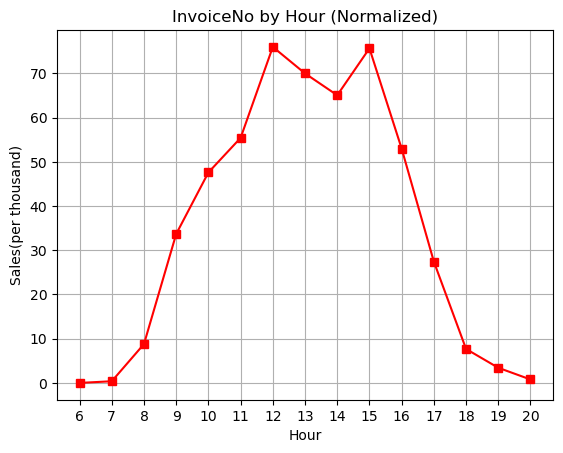

In [37]:
plt.plot(Time_to_ads['Hour'], Time_to_ads['InvoiceNo'] / 1000, marker='s',color='red')
plt.xlabel('Hour')
plt.ylabel('Sales(per thousand)')
plt.title('InvoiceNo by Hour (Normalized)')
plt.xticks(Time_to_ads['Hour'])  
plt.grid(True) 


In [38]:
#เราควรยิงโฆษณาในช่วง12.00-15.00 เนื่องจากเป็นช่วงที่มียอดขายสูงสุดและแสดงได้ว่ามีผู้เข้ามาสั่งซื้อสินค้าจำนวนมากกว่าช่วงเวลอื่นๆ
#ซึ่งมีโอกาสสูงที่จะได้คำสั่งซื้อเพิ่มในช่วงเวลานี้

In [39]:
# 3) What product sold the most ?
most_sold = df.groupby('Description')['Quantity'].sum().reset_index() #หาจำนวนสินค้าที่ขายไปแบ่งตามกลุ่มสินค้า
most_sold = most_sold.sort_values('Quantity',ascending = False ).head(5) 
most_sold

,Description,Quantity
2386,"PAPER CRAFT , LITTLE BIRDIE",80995
2051,MEDIUM CERAMIC TOP STORAGE JAR,78033
3933,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54951
1815,JUMBO BAG RED RETROSPOT,48371
3843,WHITE HANGING HEART T-LIGHT HOLDER,37872


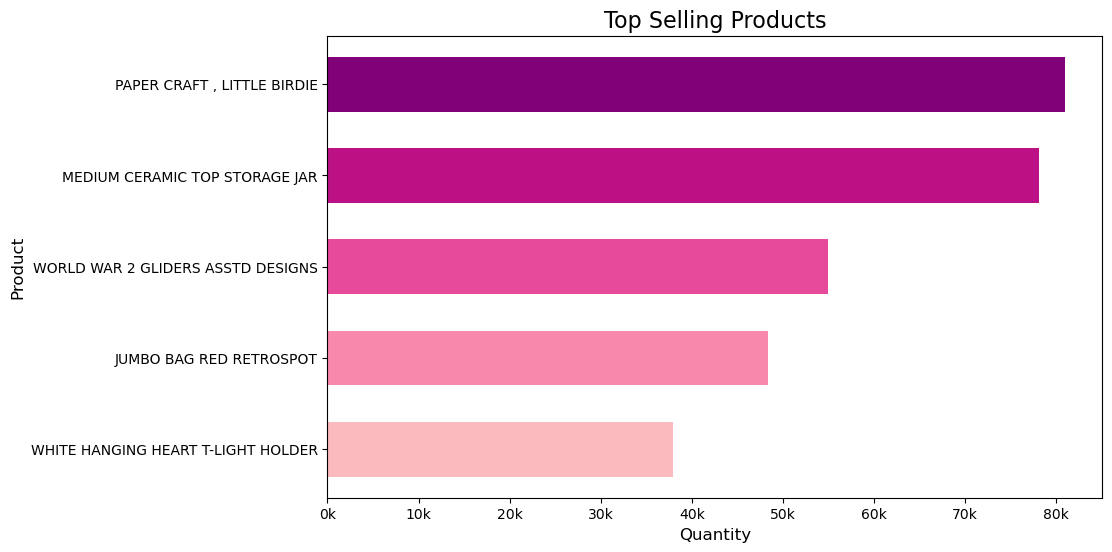

In [40]:

plt.figure(figsize=(10, 6))
#กำหนดสีและสลับสีให้เรียงจากเข้มไปอ่อน
color_palette = sns.color_palette('RdPu_r')

#กำหนดให้เป็นกราฟแท่งแนวนอน
plt.barh(most_sold['Description'], most_sold['Quantity'] / 1000, height=0.6, color=color_palette)
plt.title('Top Selling Products',fontsize=16)
plt.xlabel('Quantity',fontsize=12)
plt.ylabel('Product',fontsize=12)

#กำหนดให้ตัว k  แสดงแทนค่าหลักพัน
formatter = StrMethodFormatter('{x:.0f}k')
plt.gca().xaxis.set_major_formatter(formatter)
plt.yticks(size=10)

#กลับด้านกราฟให้แสดงจากค่ามากไปน้อย
plt.gca().invert_yaxis()


In [41]:
#PAPER CRAFT , LITTLE BIRDIE เป็นสินค้าที่มีปริมาณขายออกไปมากที่สุด

In [42]:
# 4) Which countries have more customers
# แบ่งกลุ่มตาม customerID  ซึ่งสามารถบอกจำนวนลูกค้าที่เข้ามาซื้อได้
mostCustomer =df.groupby('Country')['CustomerID'].nunique().reset_index()
mostCustomer = mostCustomer.sort_values('CustomerID',ascending=False)
mostCustomer.columns = ['Country','CustomerCounts'] 
mostCustomer

,Country,CustomerCounts
36,United Kingdom,3921
14,Germany,94
13,France,88
31,Spain,30
3,Belgium,25
33,Switzerland,22
27,Portugal,20
19,Italy,14
12,Finland,12
1,Austria,11


In [43]:
# รวมประเทศที่มีลูกค้าน้อยกว่า 30 เป็นกลุ่ม "อื่นๆ"
threshold = 30
mostCustomer.loc[mostCustomer['CustomerCounts'] < threshold, 'Country'] = 'Other'
grouped_df = mostCustomer.groupby('Country').sum().reset_index()
grouped_df = grouped_df.sort_values('CustomerCounts',ascending = False )
grouped_df

,Country,CustomerCounts
4,United Kingdom,3921
2,Other,222
1,Germany,94
0,France,88
3,Spain,30


Text(0.5, 1.0, 'Countries with Most Customers ')

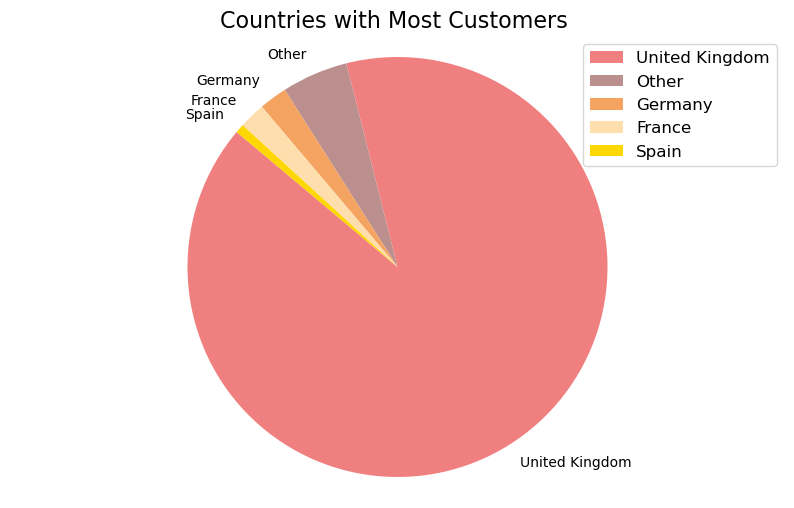

In [44]:
# สร้าง Pie Chart
plt.figure(figsize=(10, 6))
c = ['lightcoral', 'rosybrown', 'sandybrown', 'navajowhite', 'gold']
plt.pie(grouped_df['CustomerCounts'],labels=grouped_df['Country'],startangle=140,colors = c)
plt.axis('equal') 
plt.legend(grouped_df['Country'], loc='best', fontsize=12)
plt.title('Countries with Most Customers ',fontsize = 16)

In [45]:
# 5) which day has more number of sales?

In [46]:
#สร้างคอลัมวันเพื่อใช้ในการวิเคราะห์
df['Day'] = df['InvoiceDate'].dt.day_name()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time,Total,Month,Year,Hour,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,2010-01-12,08:26:00,15.30,January,2010,8,Tuesday
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12,08:26:00,20.34,January,2010,8,Tuesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,2010-01-12,08:26:00,22.00,January,2010,8,Tuesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12,08:26:00,20.34,January,2010,8,Tuesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12,08:26:00,20.34,January,2010,8,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France,2011-09-12,12:50:00,10.20,September,2011,12,Monday
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France,2011-09-12,12:50:00,12.60,September,2011,12,Monday
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France,2011-09-12,12:50:00,16.60,September,2011,12,Monday
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France,2011-09-12,12:50:00,16.60,September,2011,12,Monday


In [47]:
Days = df['Day'].unique() #ตรวจสอบว่ามีวันไหนที่มีการสั่งซื้อบ้าง
print(Days)

['Tuesday' 'Friday' 'Wednesday' 'Saturday' 'Monday' 'Thursday' 'Sunday']


In [48]:
Daysales = df.groupby(['Year', 'Day'])['Total'].sum() #รวมยอดขายทั้งหมดแยกตามวันในแต่ละปี
Daysales_2010 = Daysales.loc[2010]
Daysales_2011 = Daysales.loc[2011]
#กำหนดชื่อวันเพื่อใช้ในการเรียงข้อมุลเดือน
sortDay = ['Monday','Tuesday','Wednesday','Thursday' ,'Friday' ,'Saturday' ,'Sunday']
SortSales2010 = Daysales_2010.reindex(sortDay, level='Day').reset_index()
SortSales2011 = Daysales_2011.reindex(sortDay, level='Day').reset_index()
SortSales2010.columns = ['Day','Sales']
SortSales2011.columns = ['Day','Sales']
SortSales2010

,Day,Sales
0,Monday,164262.45
1,Tuesday,210245.26
2,Wednesday,67948.97
3,Thursday,106421.41
4,Friday,139866.18
5,Saturday,54624.15
6,Sunday,78084.31


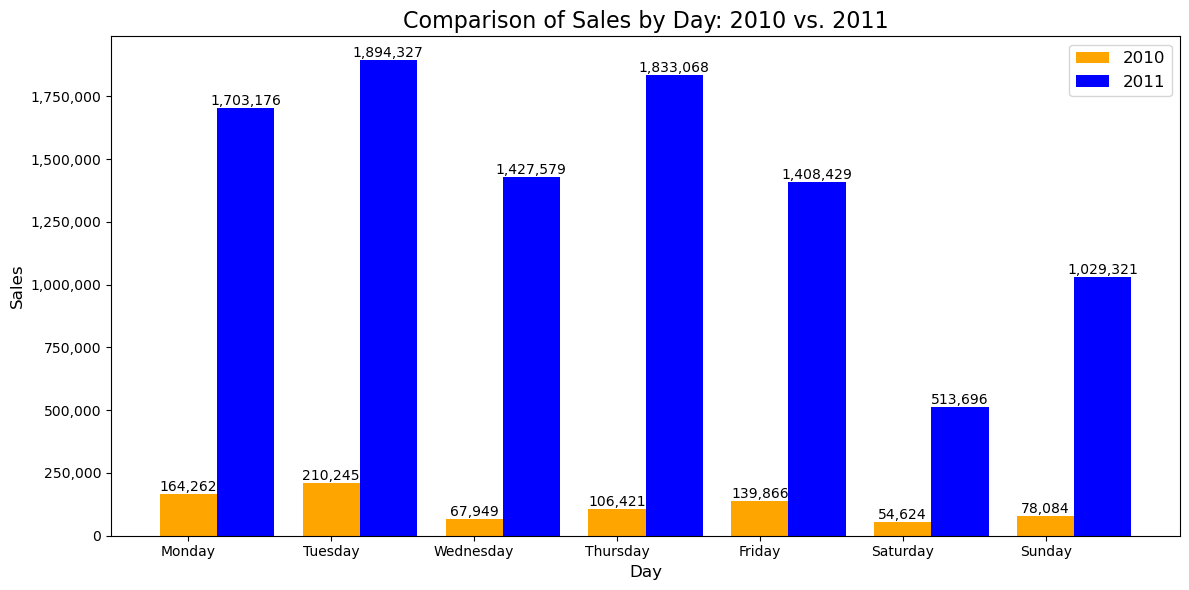

In [59]:
import matplotlib.ticker as mticker


#สร้างตัวแปรการใส่ , เพื่อแสดงเลขหลักพันได้ชัดเจนขึ้น
thousands_format = StrMethodFormatter('{x:,.0f}')

plt.figure(figsize=(12, 6))
bar_width = 0.4

#นับจำนวนแถวในตัวแปร sorted_sales_2010 และใส่ลำดับให้แต่ละแถวตั้งแต่0,1,2,..,6 เพื่อใช้ plot กราฟสองแท่งข้างกัน
x_locations = range(len(SortSales2010))

# Plot 2010 และ 2011 ข้างกัน 
plt.bar(x_locations, SortSales2010['Sales'], width=bar_width, color='orange', align='center', label='2010')
plt.bar([x + bar_width for x in x_locations], SortSales2011['Sales'], width=bar_width, color='blue', align='center', label='2011')

#กำหนดให้แกน x แสดงตามวัน
plt.xticks(x_locations, SortSales2010['Day'])

plt.title('Comparison of Sales by Day: 2010 vs. 2011', size=16)
plt.xlabel('Day', size=12)
plt.ylabel('Sales', size=12)
plt.legend(fontsize=12,loc='best')

#ใส่ , เพื่อแสดงเลขหลักพันได้ชัดเจนขึ้นสำหรับค่าแกนyและยอดขายในแต่ละวัน
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(thousands_format))

for c in ax.containers:
    ax.bar_label(c, labels=[thousands_format(x) for x in c.datavalues], fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
#ในปี 2010 และ 2011 วันอังคารมียอดขายมากที่สุด